In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import YouTubeVideo

# Lecture 20 Part 1 #

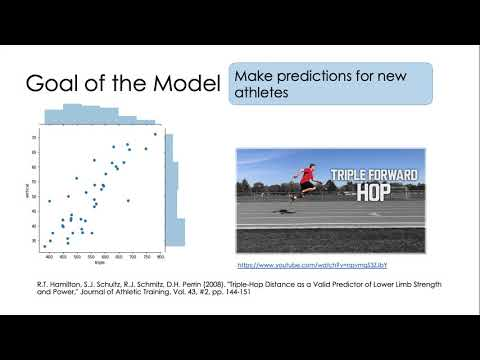

In [2]:
YouTubeVideo("u2ilGtpi4Uo")

# <span style="color: darkblue">Random Variables</span> #

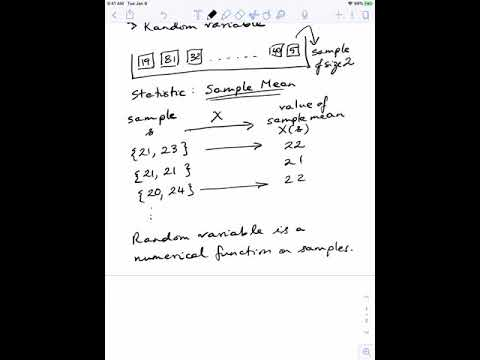

In [3]:
YouTubeVideo("LPzE6S8Vhd8")

**Now read Slides 8-14.**

# <span style="color: darkblue">Distribution</span> #

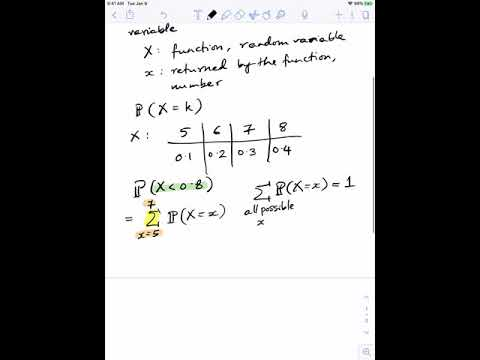

In [4]:
YouTubeVideo("mlt1fq45Iz4")

## The Main Examples ##
These are some of the greatest hits of the distribution world, listed on **Slide 15**. There are others too, but these are the ones we will use most often.

### Constant ###

A random variable that has exactly one possible value: For some number $c$, let $P(X = c) = 1$
Yes, it's a random variable. A boring one, but useful.

### Indicator: Bernoulli $(p)$ ###
An *indicator* random variable $I$ has the value 1 if a specified event happens and 0 if it doesn't happen. You can think of $I$ as a numerical code for a yes/no answer.

The distribution of $I$ is

$$
P(I = 1) = p, ~~~~~ P(I=0) = 1-p
$$

for some $p \in [0, 1]$. This is called the [Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli) $(p)$ distribution.

### Binomial $(n, p)$ ###
This the distribution of the number of heads in 10 tosses of a coin, or the number of Republicans in a sample of 400 voters drawn at random with replacement. 

You've seen it before. See Page 35 of [Lecture 2](https://drive.google.com/file/d/119g7EFyafzswyF264rrIsIex7KlPBq4B/view). If you need it, here's the [section](http://stat88.org/textbook/notebooks/Chapter_03/03_The_Binomial_Distribution.html) from Theory Meets Data. Refresh the page if the math doesn't render.

In general, suppose you have $n$ independent, repeated, success/failure trials, with chance $p$ of success on each single trial. Let $X$ be the number of successes. Then $X$ has the binomial $(n, p)$ distribution:

$$
P(X = k) ~ = ~ \binom{n}{k} p^k(1-p)^{n-k}, ~~~~ 0 \le k \le n
$$

`SciPy` makes it easy for you to find these chances. Note the use of `pmf` for probability mass function.

In [5]:
# chance of 50 heads in 100 tosses of a fair coin

stats.binom.pmf(50, 100, 0.5)

0.07958923738717888

Suppose that there are four office hour slots, and that each of seven GSIs chooses one of the slots at random, independently of the other GSIs. Let $X$ be the number of GSIs who choose Slot 1. 

**Question:** Find $P(X = 1)$.

In [6]:
# P(X = 1)

...

Ellipsis

<details>
    <summary>Answer</summary>
    About 31%
</details>

**Question:** Find $P(X > 1)$.

In [7]:
# P(X > 1)

...

Ellipsis

<details>
    <summary>Answer</summary>
    About 55.5%
</details>

### Uniform on $\{1, 2, 3, \ldots, n\}$ ###
This is the distribution of a single draw $X$ made from the set $\{1, 2, 3, \ldots, n\}$. The probability histogram is flat:

$$
P(X = k) ~ = ~ \frac{1}{n},~~~~ 1 \le k \le n
$$

You can replace the set by any other finite set of numbers. Just change the possible values accordingly.

### Uniform on the Interval $(0, 1)$ ###
This is what many random number generators try to produce by default. Exactly [how they do that](https://en.wikipedia.org/wiki/Mersenne_Twister) is a topic of research in its own right.

If $U$ is uniform on the unit interval then its density is flat over the unit interval and 0 everywhere else. Since the area under the density has to be 1, the height must be 1 as well.

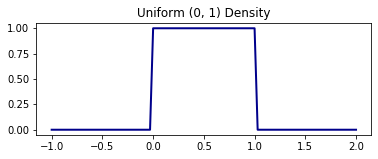

In [8]:
x = np.linspace(-1, 2, 100)
unif_density = stats.uniform.pdf(x)    # uniform (0, 1) density

plt.axes().set_aspect("equal")
plt.plot(x, unif_density, lw=2, color='darkblue')
plt.title('Uniform (0, 1) Density');

**Question:** $X$ has the uniform distribution over the interval $(a, b)$. Find the density of $X$ and sketch it.

<details>
    <summary>Answer</summary>
$f(x) = \frac{1}{b-a}$ for $a < x < b$, and $f(x) = 0$ elsewhere.
    
The sketch should look like the graph of the uniform $(0, 1)$ density apart from the interval of possible values and the height.
</details>

### Normal $(\mu, \sigma^2)$ ###

The density has an impressive equation and a familiar shape. 

$$
f(x) ~ = ~ \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}, ~~~ -\infty < x < \infty
$$

Here's the density for $\mu = 50$ and $\sigma = 5$. Note that the scale parameter argument is $\sigma$, not $\sigma^2$. Whenever you see a normal distribution in a computational system or article, it's a good idea to check the parametrization.

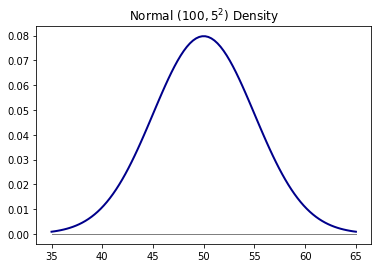

In [9]:
x = np.linspace(35, 65, 100)
norm_density = stats.norm.pdf(x, 50, 5)      # normal (50, 5**2) density

plt.plot(x, norm_density, lw=2, color='darkblue')
plt.plot(x, np.zeros(len(x)), lw=1, color='grey')
plt.title('Normal $(100, 5^2)$ Density');

Notice the points of inflection at $\mu \pm \sigma$. If you are intrepid, you can find these points of inflection by differentiating the density function twice and checking signs.

Notice also that virtually all the probability is over the interval $\mu \pm 3\sigma$.

The most important special case is the *standard normal*, which measures the variable in standard units. The density is so important that it gets its own letter:

$$
\phi(z) ~ = ~ \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}, ~~~ -\infty < z < \infty
$$

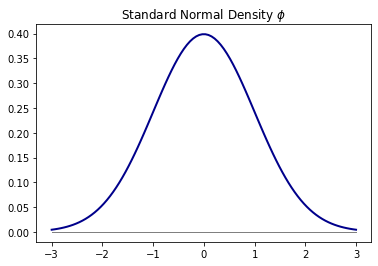

In [10]:
x = np.linspace(-3, 3, 100)
std_norm_density = stats.norm.pdf(x)     # standard normal density

plt.plot(x, std_norm_density, lw=2, color='darkblue')
plt.plot(x, np.zeros(len(x)), lw=1, color='grey')
plt.title('Standard Normal Density $\phi$');

It turns out that the indefinite integral of this function has no closed form in terms of the standard elementary math functions. So you have to use numerical intergration.

`SciPy` does that for you. If $Z$ has the standard normal distribution then

$$
\Phi(x) ~ = ~ P(Z \le x) ~ = ~ \int_{-\infty}^x \phi(z)dz
$$

The function $\Phi$ is called the *cumulative distribution function (cdf)* of $Z$, which is why `stats` calls it `cdf`. 

The gold area below is its value at $x=1$.

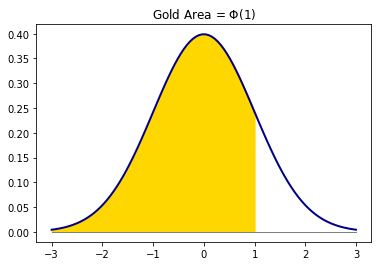

In [11]:
v = np.linspace(-3, 3, 100)
std_norm_density = stats.norm.pdf(v)
plt.plot(v, std_norm_density, lw=2, color='darkblue')
w = np.linspace(-3, 1, 100)
y_w = stats.norm.pdf(w)
plt.fill_between(w, y_w, color='gold')
plt.plot(x, np.zeros(len(x)), lw=1, color='grey')
plt.title('Gold Area = $\Phi(1)$');

In [12]:
stats.norm.cdf(1)

0.8413447460685429

In what follows, assume $Z$ has the standard normal distribution.

**Question:** Find $P(\vert Z \vert \le 1)$.

In [13]:
# P(|Z| <= 1)

...

Ellipsis

<details>
    <summary>Answer</summary>
    About 68%
</details>

**Question:** Find $P(\vert Z \vert > 2)$.

In [14]:
# P(|Z| > 2)

...

Ellipsis

<details>
    <summary>Answer</summary>
    About 5%
</details>

# <span style="color: darkblue">Two Kinds of Equality</span> #

A die is rolled twice. $X_1$ is the number on the first roll, $X_2$ is the number on the second roll.

There is a sense in which $X_1$ and $X_2$ are "the same," so is $X_1 = X_2$?

If you are not 100% confident that you can explain why the answer is "no", **go through Slides 16-19 and do the Exercises in Slide 19.**

Don't skip this, please. Flaws in understanding equality of random variables can lead to trouble in future calculations.